### Imports

In [1]:
# !pip3 install ipywidgets
# !pip3 install matplotlib

In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import random as rnd
import math
import time

### Bronnen

**Fast.ai**

+ [Practical Deep Learning for Coders](https://course.fast.ai/)
+ [Neural net foundations](https://course.fast.ai/Lessons/lesson3.html)

**CodingTrain**:

+ [Linear Regression with Gradient Descent](https://www.youtube.com/watch?v=L-Lsfu4ab74)
+ [Mathematics of Gradient Descent](https://www.youtube.com/watch?v=jc2IthslyzM)

In [4]:
m2 = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]

In [5]:
prices = [384.91367692954503, 389.8967479767937, 401.20788969026364, 465.1388607569204, 414.0688201351979, 325.18526099613297, 460.2622840847401, 425.28637650519823, 435.81289210983635, 466.1119350690599, 481.26084158347044, 553.44910806194, 524.9645554759068, 493.73550242106825, 441.31748783586255, 428.9736342758598, 524.2439536647842, 605.7756579042834, 523.9159804732369, 520.5573694360451, 572.2243354280608, 440.25182913939256, 527.1405877998808, 590.3253772815467, 624.1383069765612, 553.1559229141405, 603.3619901081537, 601.374941452989, 645.7628766092549, 520.074445002628, 644.777548130977, 505.9835725792402, 435.60382044468037, 583.5176490260349, 568.8932967557804, 701.3208570139484, 693.4986129729026, 568.6647681093013, 720.31529963436, 597.8458023030355, 668.9629307564601, 661.4270155430428, 697.0093900222645, 753.3045418080637, 747.688965355471, 734.4919571308446, 762.4963668464409, 757.4944426355083, 687.111017434628, 687.7840234328396, 712.102220810479, 786.9528480333747, 741.4919100301831, 929.5027955736383, 715.6495220469454, 703.0787780068489, 840.7931460828787, 893.5294986940426, 836.3984883587482, 866.5072142177371, 914.8441484209513, 815.4180766788587, 729.3928746802716, 798.7546416176901, 909.7027030121603, 748.9425115745198, 859.3471924551083, 881.7266151539443, 848.9085484630431, 928.6542390457668, 925.6545819068597, 1054.4985961830512, 942.3977437441195, 863.3417578949857, 873.6741685366178, 861.7893229130596, 993.6591491871075, 894.321701563041, 936.0817458409582, 1000.4511833502772, 904.3575906544015, 941.4439425467597, 840.1099614077259, 900.2264966672901, 943.2584511465706, 1019.103269196167, 1080.5445290710309, 1002.7073230785402, 1029.2954995439861, 1029.7578557983063]

# Deep Learning

### Preparation

In [8]:
#------------------------------------------

def preparePlot(t):
    
    fig, ax = plt.subplots()
    ax.set(xlim=[-10, 10], ylim=[-50, 400], xlabel='x', ylabel='y', title=t)

#------------------------------------------

def plotCurve(x, y, scatter):

    if scatter:
        
        plt.scatter(x, y)
        
    else:
        
        plt.plot(x, y, 'red')

#------------------------------------------

def showPlot():
    
    plt.show()

#------------------------------------------

In [9]:
x = [x for x in range(-10, 11, 1)]

print(x)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [10]:
# The answer to everything
rnd.seed(42)

a = 2
b = 3
c = -10

# Prepare random data
y = [a * x**2 + b * x + c for x in x]

# Mean
mu = 5

# Define standard deviation (spread)
sigma = 20

# Prepare random data
yNoise = [a * x**2 + b * x + c + rnd.gauss(mu, sigma) for x in x]

print(y)

[160, 125, 94, 67, 44, 25, 10, -1, -8, -11, -10, -5, 4, 17, 34, 55, 80, 109, 142, 179, 220]


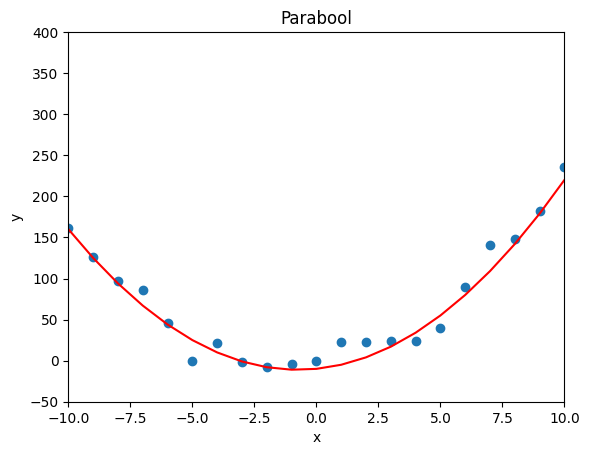

In [11]:
preparePlot("Parabool")
plotCurve(x,y, False)
plotCurve(x,yNoise, True)
showPlot()

## Doel: best fit maken

### ReLU: Rectified Linear Unit

In [12]:
#------------------------------------------

def relu(w, b, x):
    
    y = w * x + b
    
    if y > 0:
        
        
        return y
    
    else:
        
        return 0

#------------------------------------------

In [13]:
#------------------------------------------

def manualRelu(w, b):
    
    rlu = [relu(w, b, x) for x in x]
    
    preparePlot("ReLU")
    
    plotCurve(x, rlu, False)

#------------------------------------------

interact(manualRelu, w=(-30,30,0.1), b=(-100,100,0.1))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w', max=30.0, min=-30.0), FloatSlider(value=0.0, des…

<function __main__.manualRelu(w, b)>

### Handmatige parabool fit met ReLU

In [15]:
#------------------------------------------

def mse(fit):
    
    sse = 0
    
    # Sum of squared errors
    for i in range(0, len(yNoise)):
        
        # Error = actual - predicted
        err = yNoise[i] - fit[i]
        sse += (err**2)
    
    # Mean squared error
    return sse / len(yNoise)

#------------------------------------------

def parabolaFit(w1, b1, w2, b2):
    
    fit = [relu(w1, b1, x) + relu(w2, b2, x) for x in x]
    
    preparePlot("Som van 2 ReLUs")
    
    plotCurve(x, fit, False)
    plotCurve(x, yNoise, True)
    
    showPlot()
    
    # Our indicator
    print(mse(fit))

#------------------------------------------
    
interact(parabolaFit, w1=(-50,50,0.01), b1=(-100,100,0.01), w2=(-50,50,0.01), b2=(-100,100,0.01))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w1', max=50.0, min=-50.0, step=0.01), FloatSlider(va…

<function __main__.parabolaFit(w1, b1, w2, b2)>

### Gradient descent

initial cost:  9702.1711632593
w1Fit:  24.819842203995606 b1Fit:  -57.5734756923642 w2Fit:  16.91626416625905 b2Fit:  -125.74286800634303 w3Fit: -21.607301892698867 b3Fit: -183.66236954237317 w4Fit: -19.77360576942839 b4Fit: -66.36999132178134
final cost:  204.05341807110125


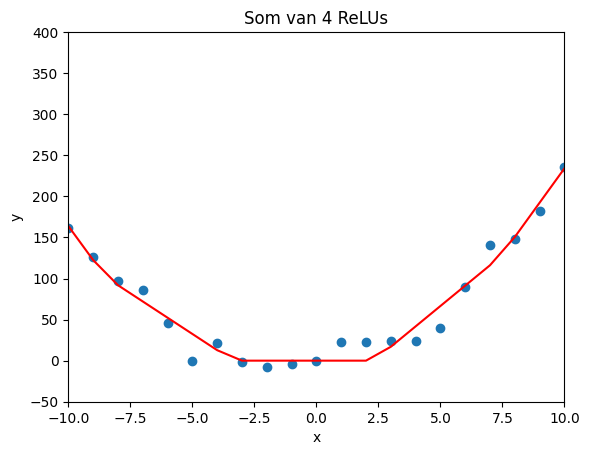

In [37]:
#------------------------------------------

# Learning iterations
epochs = 300000

# Learning rate
learningRate = 1e-4

#------------------------------------------

# Initial values ("guess")
w1Fit = 0.0
b1Fit = 0.0
w2Fit = 0.0
b2Fit = 0.0
w3Fit = 0.0
b3Fit = 0.0
w4Fit = 0.0
b4Fit = 0.0

# Epochs counter
epoch = 0

#------------------------------------------

def cost(w1, b1, w2, b2,w3,b3,w4,b4):
    
    sse = 0
    
    # Sum of squared errors
    for i in range(0, len(yNoise)):
        
        # Use yhat = ReLU(w1 * x + b1) + ReLU(w2 * x + b2) + 
        yhat = relu(w1, b1, x[i]) + relu(w2, b2, x[i])+ relu(w3, b3, x[i])+ relu(w4, b4, x[i])
        
        # Use error = y - yhat
        err = yNoise[i] - yhat
        
        sse += (err**2)
    
    # Mean squared error
    return sse / len(yNoise)

#------------------------------------------

def gradientDescent(w1, b1, w2, b2, w3, b3,w4,b4):
    
    # The change of our weights and biases
    dw1 = 0
    db1 = 0
    
    dw2 = 0
    db2 = 0

    dw3 = 0
    db3 = 0

    dw4 = 0
    db4 = 0
    
    # Stochastic gradient descent
    for i in range(0, len(yNoise)):
    
        # Use yhat = ReLU(w1 * x + b1) + ReLU(w2 * x + b2)
        yhat = relu(w1, b1, x[i]) + relu(w2, b2, x[i])+relu(w3, b3, x[i])+relu(w4, b4, x[i])
        
        # Use error = y - yhat
        err = yNoise[i] - yhat

        # Gradient descent steps
        dw1 -= 2 * err * x[i]
        db1 -= 2 * err
        
        # Adjust with learn rate
        w1 -= learningRate * dw1
        b1 -= learningRate * db1

        yhat = relu(w1, b1, x[i]) + relu(w2, b2, x[i])+relu(w3, b3, x[i])+relu(w4, b4, x[i])
        
        # Use error = y - yhat
        err = yNoise[i] - yhat
        
        dw2 -= 2 * err * x[i]
        db2 -= 2 * err
        
        # Adjust with learn rate
        w2 -= learningRate * dw2
        b2 -= learningRate * db2


        yhat = relu(w1, b1, x[i]) + relu(w2, b2, x[i])+relu(w3, b3, x[i])+relu(w4, b4, x[i])
        
        # Use error = y - yhat
        err = yNoise[i] - yhat
        
        dw3 -= 2 * err * x[i]
        db3 -= 2 * err
        
        # Adjust with learn rate
        w3 -= learningRate * dw3
        b3 -= learningRate * db3

        yhat = relu(w1, b1, x[i]) + relu(w2, b2, x[i])+relu(w3, b3, x[i])+relu(w4, b4, x[i])
        
        # Use error = y - yhat
        err = yNoise[i] - yhat
        
        dw4 -= 2 * err * x[i]
        db4 -= 2 * err
        
        # Adjust with learn rate
        w4 -= learningRate * dw4
        b4 -= learningRate * db4
    
    return w1, b1, w2, b2,w3,b3,w4,b4

#------------------------------------------

def plotFit(w1, b1, w2, b2,w3,b3,w4,b4):
    
    fit = [ relu(w1, b1, x) + relu(w2, b2, x)+relu(w3, b3, x)+relu(w4, b4, x)  for x in x]
    
    preparePlot("Som van 4 ReLUs")
    
    plotCurve(x, fit, False)
    plotCurve(x, yNoise, True)
    
    showPlot()

#------------------------------------------

# Inital cost
mse = cost(w1Fit, b1Fit, w2Fit, b2Fit,w3Fit,b3Fit,w4Fit,b4Fit)

print("initial cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit,w3Fit,b3Fit,w4Fit,b4Fit))

#------------------------------------------

while epoch < epochs:
    
    # print("epoch: ", epoch)
    
    w1Fit, b1Fit, w2Fit, b2Fit, w3Fit, b3Fit,w4Fit,b4Fit  = gradientDescent(w1Fit, b1Fit, w2Fit, b2Fit,w3Fit,b3Fit,w4Fit,b4Fit)
    
    # print("cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit))
    
    epoch += 1
    
#------------------------------------------

print("w1Fit: ", w1Fit, "b1Fit: ", b1Fit, "w2Fit: ", w2Fit, "b2Fit: ", b2Fit,'w3Fit:',w3Fit,'b3Fit:',b3Fit,'w4Fit:',w4Fit,'b4Fit:',b4Fit)
print("final cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit,w3Fit,b3Fit,w4Fit,b4Fit))

plotFit(w1Fit, b1Fit, w2Fit, b2Fit,w3Fit,b3Fit,w4Fit,b4Fit)